# Veri Toplama
- yfinance, investpy, quandl gibi kütüphaneler kullanılarak, 2005-01-01 tarihinden
itibaren aylık getirilere sahip hisse senetleri ve sektör verileri toplanacak.
- Web scraping ile sektörlerin ve hisse senetlerinin listesi çekilecek.

In [2]:
#!pip install yfinance
#!pip install scipy==1.14.0
#!pip install --upgrade tsfresh

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

In [3]:
def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
        
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
        
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df
    
def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
        df.drop(columns='No.', inplace=True)
        
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

In [8]:
sectors=fetch_sectors_names()
indusrty=fetch_industry_names()

In [10]:
sectors

,Sector Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Financials,1272,11.96T,0.17%,15.88,19.97%,-0.56%,37.57%
1,Healthcare,1157,"8,050.42B",0.51%,59.35,3.19%,-0.64%,10.10%
2,Technology,769,21.51T,0.49%,45.77,14.62%,-1.02%,48.02%
3,Industrials,661,"5,902.02B",1.19%,29.37,7.25%,-0.60%,26.47%
4,Consumer Discretionary,561,"8,772.75B",0.75%,29.42,6.51%,-2.14%,38.69%
5,Materials,266,"2,035.83B",1.71%,27.95,6.33%,-1.00%,13.76%
6,Real Estate,263,"1,675.38B",3.78%,49.20,9.51%,-0.40%,13.67%
7,Energy,251,"3,613.08B",3.18%,13.25,8.18%,-0.05%,12.47%
8,Communication Services,245,"6,456.13B",1.46%,33.37,11.59%,-1.02%,40.95%
9,Consumer Staples,242,"4,229.57B",1.53%,29.62,4.90%,-0.38%,26.62%


In [12]:
# Çektiğim verileri, data klasörü içerisinde tutuyorum
#mkdir ..\data\stock_sectors

In [14]:
fetch_data(sectors='energy').to_csv('../data/stock_sectors/energy.csv')

fetch_data(sectors='financials').to_csv('../data/stock_sectors/financials.csv')

fetch_data(sectors='healthcare').to_csv('../data/stock_sectors/healthcare.csv')

fetch_data(sectors='technology').to_csv('../data/stock_sectors/technology.csv')

fetch_data(sectors='utilities').to_csv('../data/stock_sectors/utilities.csv')

fetch_data(sectors='real-estate').to_csv('../data/stock_sectors/real-estate.csv')

fetch_data(sectors='materials').to_csv('../data/stock_sectors/materials.csv')

fetch_data(sectors='industrials').to_csv('../data/stock_sectors/industrials.csv')

fetch_data(sectors='consumer-staples').to_csv('../data/stock_sectors/consumer-staples.csv')

fetch_data(sectors='consumer-discretionary').to_csv('../data/stock_sectors/consumer-discretionary.csv')

fetch_data(sectors='communication-services').to_csv('../data/stock_sectors/communication-services.csv')

- Hangi sütunu baz alacağımı kararlaştırmak için sütun isimlerini yazdırdım
- ['Open'] sütununu baz alacağım

In [16]:
aapl_data = yf.download("AAPL")
print(aapl_data.columns)

[*********************100%***********************]  1 of 1 completed

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [19]:
aapl_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600


In [5]:
financials = pd.read_csv('../data/stock_sectors/financials.csv')
healthcare = pd.read_csv('../data/stock_sectors/healthcare.csv')
technology = pd.read_csv('../data/stock_sectors/technology.csv')

# **Tarihsel Veri Filtreleme ve Rastgele Firma Seçme**
    - Rastgele seçim yapmadan önce 2005 öncesi verisi olan hisseleri otomatik filtreledim
    - En büyük 3 endüstriden (Sağlık, Finans ve Teknoloji) rastgele 500 tane firma seçtim
    - Burada herhangi bir işlem yapmama gerek kalmadı çünkü zaten önceden hem boş sütunları temizledim hem de bütün veriyi 2005 tarihinden sonrası için ayarladım, kısacası sadece rastgele olarak firma seçmek kaldı

In [24]:
# Geçerli semboller (NaN veya float olmayanları aldım)
technology_tickers = technology['Symbol'].dropna().astype(str).tolist()
financials_tickers = financials['Symbol'].dropna().tolist()
healthcare_tickers = healthcare['Symbol'].dropna().tolist()

# Her bir kategoriden EN BÜYÜK 500 şirket seçtim
technology_biggest = technology_tickers[:500]
financials_biggest = financials_tickers[:500]
healthcare_biggest = healthcare_tickers[:500]

# Tüm şirketleri birleştirdim
all_biggest_tickers = technology_biggest + financials_biggest + healthcare_biggest

len(all_biggest_tickers)

1500

In [26]:
import time

# Semboller için listeyi 100'lük parçalara böldüm ki veri çekmesi kolay olsun
chunks = [all_biggest_tickers[i:i+100] for i in range(0, len(all_biggest_tickers), 100)]

# Veriyi parça parça çektim
all_data = []
for chunk in chunks:
    try:
        data = yf.download(chunk, start='2005-01-01')
        all_data.append(data)
        time.sleep(15)  # 15 saniye bekleme, API limitini aşmamak için
    except yf.download.YFRateLimitError:
        print("Rate limit exceeded. Retrying in 60 seconds...")
        time.sleep(60)

[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed

1 Failed download:
['AGM.A']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed

2 Failed downloads:
['CRD.B', 'CRD.A']: YFTzMissingError('$%ticker%: po

```
tickers = technology['Symbol'].tolist()

# Verileri çek
data = yf.download(tickers, start='2005-01-01')
```

`TypeError: expected string or bytes-like object, got 'float'. `
- Bu hatayı aldığım için ``yfinance.download()`` fonksiyonu bir ``float`` değeri ile karşılaşıyor, fakat bu fonksiyon yalnızca ``string`` türündeki sembollerle çalışabilir. ``technology[Symbol]`` sütununda bazı ``NaN`` veya ``float`` değerleri mevcut. Bu nedenle hata veriyor
    1. NaN değerlerini temizledim
    2. Sadece string değerleri aldım
- Ekstra olarak
    - `YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')` hatası nedeniyle aralıklı veri indirdim

In [38]:
# Sonuçları birleştir
final_data = pd.concat(all_data, axis=1)

# "Open" fiyatlarını al
data_open = final_data['Open']

# Günlük verileri aylığa çeviriyoruz.
data_open_monthly = data_open.resample('M').first()

# Sonuç
print(data_open_monthly.head())

Ticker          AAPL        ACN       ADBE        ADI        ADP       ADSK  \
Date                                                                          
2005-01-31  0.975804  19.106173  31.493821  23.208161  21.876525  38.280256   
2005-02-28  1.160631  18.113645  28.444421  22.499747  21.432085  29.144969   
2005-03-31  1.355400  18.134909  31.023913  23.340554  21.209857  29.914572   
2005-04-30  1.268032  17.702456  33.910000  22.857040  22.277331  29.690001   
2005-05-31  1.090887  15.348744  29.870001  21.419060  21.528969  31.850000   

Ticker      AFRM       AMAT        AMD  ANET  ...  TSHA  UPB  URGN  VALN  VMD  \
Date                                          ...                               
2005-01-31   NaN  12.584158  22.110001   NaN  ...   NaN  NaN   NaN   NaN  NaN   
2005-02-28   NaN  11.735457  15.900000   NaN  ...   NaN  NaN   NaN   NaN  NaN   
2005-03-31   NaN  12.906073  17.629999   NaN  ...   NaN  NaN   NaN   NaN  NaN   
2005-04-30   NaN  12.035427  16.309999   

In [40]:
%matplotlib inline

- Görüldüğü gibi, bazı şirketlerin verilerinde 2005 yılından itibaren en az 10-15 yıllık boşluklar bulunmakta, ve bu boşlukları doldurmak mantıksız çünkü bu şirketlerin kuruluş yılları 2016 yıllarına dayanmaktadır. Bu nedenle boş (NaN) verileri %80 ve üstü olan sütunları (şirketleri) temizledim.

<Axes: xlabel='Date'>

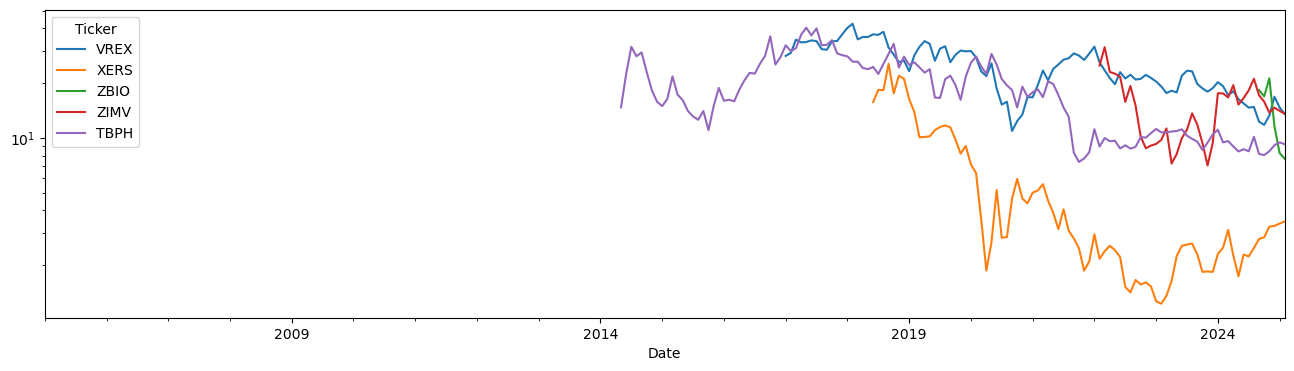

In [45]:
import matplotlib.pyplot as plt

# Şirket isimlerini belirleyin
companies = ['VREX', 'XERS', 'ZBIO', 'ZIMV', 'TBPH']

# Veriyi sadece istenen şirketlere göre filtrele
data_open_monthly_filtered = data_open_monthly[companies]

data_open_monthly_filtered.plot(kind='line',figsize=(16,4),logy=True)

In [47]:
# %60'tan fazla eksik veri içeren sütunları sil
threshold = len(data_open_monthly) * 0.8  # %80'lık bir doluluk oranı gerekiyor

filtered_data = data_open_monthly.dropna(axis=1, thresh=threshold)

# Sonucu göster
print(filtered_data.head())

Ticker          AAPL        ACN       ADBE        ADI        ADP       ADSK  \
Date                                                                          
2005-01-31  0.975804  19.106173  31.493821  23.208161  21.876525  38.280256   
2005-02-28  1.160631  18.113645  28.444421  22.499747  21.432085  29.144969   
2005-03-31  1.355400  18.134909  31.023913  23.340554  21.209857  29.914572   
2005-04-30  1.268032  17.702456  33.910000  22.857040  22.277331  29.690001   
2005-05-31  1.090887  15.348744  29.870001  21.419060  21.528969  31.850000   

Ticker           AMAT        AMD       ANSS       APH  ...  CERS        CYH  \
Date                                                   ...                    
2005-01-31  12.584158  22.110001  16.219999  2.011462  ...  2.95  22.856671   
2005-02-28  11.735457  15.900000  16.299999  2.180542  ...  3.42  23.790934   
2005-03-31  12.906073  17.629999  18.000000  2.203526  ...  4.40  26.741238   
2005-04-30  12.035427  16.309999  17.125000  2.0337

1. **`data_open_monthly.reset_index()`**
   - `long_data = filtered_data.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Open')` Bu satır, `filtered_data` verisini **uzun formata** dönüştürmek için pandas'ın `melt()` fonksiyonunu kullanır.
   - `filtered_data` bir pandas **Series** objesidir ve indeksi tarihlerdir (aylık bazda).  
   - `reset_index()`, bu diziyi bir **DataFrame**'e çevirir.  
     - **İndeks** (`Date` sütunu olarak) veriye eklenir.
     - Açılış fiyatları aynı sütunda kalır.

3. **`.melt(id_vars='Date', var_name='Ticker', value_name='Open')`**  
   - `melt()` fonksiyonu, veriyi **geniş formattan uzun formata** dönüştürür.
   - **`id_vars='Date'`** → `"Date"` sütununu korur.
   - **`var_name='Ticker'`** → Önceden sütun başlıklarında olan hisse senedi kodlarını `"Ticker"` olarak adlandırır.
   - **`value_name='Open'`** → Açılış fiyatlarını `"Open"` sütununa taşır.

---

#### **Dönüştürmeden Önce (Geniş Format)** 
| Date       | AAPL | MSFT | GOOG |  
|------------|------|------|------|  
| 2024-01-01 | 150  | 300  | 2800 |  
| 2024-02-01 | 155  | 310  | 2900 |  

#### **Dönüştürdükten Sonra (Uzun Format)**  
| Date       | Ticker | Open |  
|------------|--------|------|  
| 2024-01-01 | AAPL   | 150  |  
| 2024-01-01 | MSFT   | 300  |  
| 2024-01-01 | GOOG   | 2800 |  
| 2024-02-01 | AAPL   | 155  |  
| 2024-02-01 | MSFT   | 310  |  
| 2024-02-01 | GOOG   | 2900 |  

---

### **Neden Kullanılır?**
- Uzun format, **gruplama, filtreleme ve görselleştirme** işlemleri için daha uygundur.
- `seaborn` veya `matplotlib` ile grafik çizmek için daha kullanışlıdır.
- **Diğer veri setleriyle birleştirme** işlemleri (örneğin, sektör bilgisi eklemek) daha kolay olur.
- Ben 2. ve 3. neden için kullanıyor olacağım


In [67]:
# Uzun formata çevirme
long_data = filtered_data.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Open')

# Sektör bilgilerini ekleme
sector_map = {}
for ticker in financials_biggest:
    sector_map[ticker] = 'Financials'

for ticker in healthcare_biggest:
    sector_map[ticker] = 'Healthcare'

for ticker in technology_biggest:
    sector_map[ticker] = 'Technology'

long_data['Sector'] = long_data['Ticker'].map(sector_map)

In [ ]:
# Datayı kayıt et
long_data.to_csv('../data/processed_data/combined_data.csv', index=False)

In [21]:
long_formatted_data = pd.read_csv('../data/processed_data/combined_data.csv')

# İlk 5 Veri
long_formatted_data.head()

,Date,Ticker,Open,Sector
0,2005-01-31,AAPL,0.975804,Technology
1,2005-02-28,AAPL,1.160631,Technology
2,2005-03-31,AAPL,1.355400,Technology
3,2005-04-30,AAPL,1.268032,Technology
4,2005-05-31,AAPL,1.090887,Technology


In [23]:
meaningless_data_difference = long_formatted_data[
    (long_formatted_data["Ticker"].isin(["AAPL", "EYPT"])) &
    (long_formatted_data["Date"].between("2005-01-01", "2006-01-01"))
][["Date", "Ticker", "Open"]]

print(meaningless_data_difference)

              Date Ticker        Open
0       2005-01-31   AAPL    0.975804
1       2005-02-28   AAPL    1.160631
2       2005-03-31   AAPL    1.355400
3       2005-04-30   AAPL    1.268032
4       2005-05-31   AAPL    1.090887
5       2005-06-30   AAPL    1.201753
6       2005-07-31   AAPL    1.109566
7       2005-08-31   AAPL    1.282493
8       2005-09-30   AAPL    1.415954
9       2005-10-31   AAPL    1.631662
10      2005-11-30   AAPL    1.724452
11      2005-12-31   AAPL    2.077235
169884  2005-01-31   EYPT  420.000000
169885  2005-02-28   EYPT  356.000000
169886  2005-03-31   EYPT  328.000000
169887  2005-04-30   EYPT  270.000000
169888  2005-05-31   EYPT  208.000000
169889  2005-06-30   EYPT  238.000000
169890  2005-07-31   EYPT  244.399994
169891  2005-08-31   EYPT  272.000000
169892  2005-09-30   EYPT  244.000000
169893  2005-10-31   EYPT  276.399994
169894  2005-11-30   EYPT  240.000000
169895  2005-12-31   EYPT  188.000000


### Log Dönüşümü Uygulaması ve Nedenleri

Veri setinizde farklı ölçeklerde değerler gözlemlenmektedir. Örneğin, bazı Ticker'ların (ör. **AAPL**) değerleri 1 civarındayken, bazıları (ör. **EYPT**) 400 gibi yüksek değerlere sahip. Bu durum, modellerin öğrenme sürecinde farklı ölçekler arasında dengesizliğe yol açabilir.

#### Log Dönüşümünün Avantajları
- **Ölçek Dengeleme:**  
  Log dönüşümü, büyük değerlerin etkisini azaltarak tüm değerleri daha benzer bir ölçeğe çeker. Bu, özellikle farklı büyüklükteki değişkenlerin (tickerların) analizinde faydalıdır.

- **Varyansın Stabilizasyonu:**  
  Log dönüşümü, veri dağılımındaki varyansı stabil hale getirerek aşırı uç değerlerin (outlier) etkisini hafifletebilir.

- **Dağılımın Normalleşmesi:**  
  Birçok durumda log dönüşümü, verinin sağa çarpık dağılımını (right-skewed) daha normal bir dağılıma yaklaştırır, bu da bazı makine öğrenmesi algoritmalarının performansını artırabilir.

#### Dikkat Edilmesi Gerekenler
- **Pozitif Değerler:**  
  Log dönüşümünü doğrudan uygulayabilmek için verilerinizin pozitif olması gerekir. Eğer bazı değerler 0 veya negatif ise, `log1p` (yani, log(1 + x)) dönüşümü uygulanabilir.

- **Farklı Ölçekler:**  
  Her ticker için log dönüşümünü ayrı ayrı uygulamak daha mantıklı olabilir. Bu sayede, her bir zaman serisinin kendi dağılım özelliklerine göre dönüşüm yapılır.

- **Küçük Değerler:**  
  Değerlerin 1'in altında olması durumunda log dönüşümü negatif sonuçlar verecektir. Bu durum modelleme açısından problem oluşturmaz, ancak yorumlanması sırasında dikkatli olunmalıdır.

#### Sonuç
Eğer bazı değerler diğerlerine göre "mantıksız" ya da "ölçülemeyecek kadar farklı" görünüyorsa, **log dönüşümü uygulamak**:
- Büyük ölçekli değerlerin etkisini azaltır,
- Farklı tickerların değerlerini karşılaştırılabilir hale getirir,
- Makine öğrenmesi ve istatistiksel modellerde daha stabil sonuçlar elde etmenize yardımcı olur.

Bu nedenle, veri setinizdeki ölçek farklılıklarını gidermek ve istatistiksel özellikleri (örn. `tsfresh` ile çıkarılacak öznitelikler) daha tutarlı hale getirmek için log dönüşümü mantıklı bir adım olabilir.

In [31]:
import numpy as np

long_formatted_data["Open_LOG"] = np.log1p(long_formatted_data["Open"])

'''
Halihazırdaki Open sütununu güncellemek yerine yeni sütun açmak daha mantıklı 
çünkü bu kısmı tekrar tekrar çalıştırırsak Open değerleri sürekli değişiyor olacak.
'''

'\nHalihazırdaki Open sütununu güncellemek yerine yeni sütun açmak daha mantıklı \nçünkü bu kısmı tekrar tekrar çalıştırırsak Open değerleri sürekli değişiyor olacak.\n'

In [33]:
meaningless_data_difference = long_formatted_data[
    (long_formatted_data["Ticker"].isin(["AAPL", "EYPT"])) &
    (long_formatted_data["Date"].between("2005-01-01", "2006-01-01"))
][["Date", "Ticker", "Open_LOG"]]

print(meaningless_data_difference)

              Date Ticker  Open_LOG
0       2005-01-31   AAPL  0.680975
1       2005-02-28   AAPL  0.770400
2       2005-03-31   AAPL  0.856710
3       2005-04-30   AAPL  0.818913
4       2005-05-31   AAPL  0.737588
5       2005-06-30   AAPL  0.789254
6       2005-07-31   AAPL  0.746482
7       2005-08-31   AAPL  0.825268
8       2005-09-30   AAPL  0.882094
9       2005-10-31   AAPL  0.967615
10      2005-11-30   AAPL  1.002267
11      2005-12-31   AAPL  1.124031
169884  2005-01-31   EYPT  6.042633
169885  2005-02-28   EYPT  5.877736
169886  2005-03-31   EYPT  5.796058
169887  2005-04-30   EYPT  5.602119
169888  2005-05-31   EYPT  5.342334
169889  2005-06-30   EYPT  5.476464
169890  2005-07-31   EYPT  5.502890
169891  2005-08-31   EYPT  5.609472
169892  2005-09-30   EYPT  5.501258
169893  2005-10-31   EYPT  5.625460
169894  2005-11-30   EYPT  5.484797
169895  2005-12-31   EYPT  5.241747


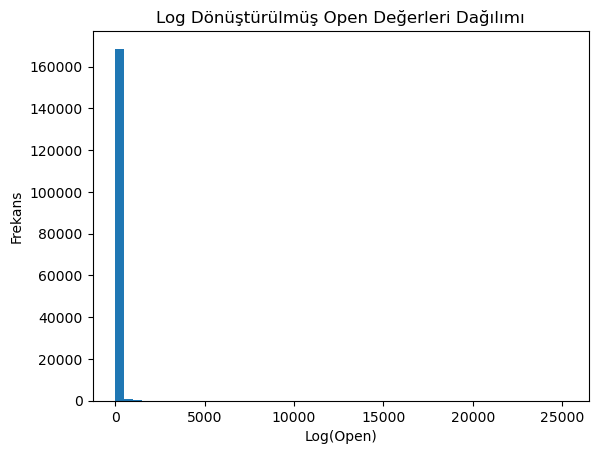

In [35]:
import matplotlib.pyplot as plt

plt.hist(long_formatted_data["Open"], bins=50)
plt.title("Log Dönüştürülmemiş Open Değerleri Dağılımı")
plt.xlabel("Open")
plt.ylabel("Frekans")
plt.show()

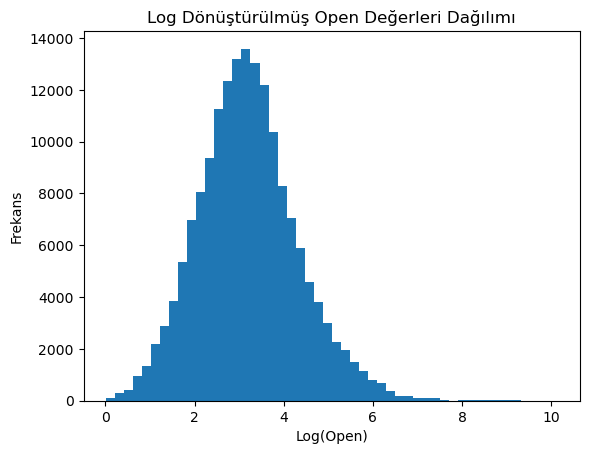

In [37]:
plt.hist(long_formatted_data["Open_LOG"], bins=50)
plt.title("Log Dönüştürülmüş Open Değerleri Dağılımı")
plt.xlabel("Log(Open)")
plt.ylabel("Frekans")
plt.show()

In [43]:
long_formatted_data.head()

,Date,Ticker,Open,Sector,Open_LOG
0,2005-01-31,AAPL,0.975804,Technology,0.680975
1,2005-02-28,AAPL,1.160631,Technology,0.770400
2,2005-03-31,AAPL,1.355400,Technology,0.856710
3,2005-04-30,AAPL,1.268032,Technology,0.818913
4,2005-05-31,AAPL,1.090887,Technology,0.737588


In [45]:
long_formatted_data.to_csv('../data/processed_data/LOG_combined_data.csv', index=False)

In [47]:
# Oluşturduğumuz tabloyu okuyalaım
combined_data = pd.read_csv('../data/processed_data/LOG_combined_data.csv')

combined_data.head()

,Date,Ticker,Open,Sector,Open_LOG
0,2005-01-31,AAPL,0.975804,Technology,0.680975
1,2005-02-28,AAPL,1.160631,Technology,0.770400
2,2005-03-31,AAPL,1.355400,Technology,0.856710
3,2005-04-30,AAPL,1.268032,Technology,0.818913
4,2005-05-31,AAPL,1.090887,Technology,0.737588


- Data-type'larında hata var ve tsfresh kütüphanesi ile çalışamam
- Hatanın nedeni, Date sütunu type olarak obect ancak datetime64 olması gerek

In [49]:
print(combined_data.dtypes)

Date         object
Ticker       object
Open        float64
Sector       object
Open_LOG    float64
dtype: object


In [51]:
# Date sütununu datetime64 formuna çevirdim
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

In [53]:
print(combined_data.dtypes)

Date        datetime64[ns]
Ticker              object
Open               float64
Sector              object
Open_LOG           float64
dtype: object


In [55]:
combined_data.isna().sum()

Date           0
Ticker         0
Open        1855
Sector         0
Open_LOG    1855
dtype: int64

## Kategorik Değişkenlerle Çalışma

Kategorik veriler, sayısal olmayan ve genellikle kategorilere ayrılan verilerdir. Örneğin, bir şirketin faaliyet gösterdiği sektör gibi kategorik bilgiler, modelleme süreçlerinde sayısal verilere dönüştürülmelidir. Kategorik verileri sayısal hale getirmek için kullanılan yaygın yöntemler **One-Hot Encoding** ve **Label Encoding**'dir.

### Sektör Verisi (Nominal Değişken)

Verimdeki **Sektör** bilgisi, **nominal** (isimsel) bir değişkendir. Yani, sektörler arasında **doğal bir sıralama** ya da **ağırlık** yoktur. Örneğin, bir şirketin teknoloji, finans veya sağlık sektöründe olması, diğer sektörlere göre daha üstün ya da daha düşük bir değer taşımaz. Her bir sektör, sadece bir isimsel kategoriyi ifade eder.

### One-Hot Encoding

Nominal veriler için, **One-Hot Encoding** yöntemi genellikle tercih edilir. Bu yöntemde, her benzersiz kategori için ayrı bir sütun oluşturulur ve gözlemde o kategoriye ait olan değer **1** ile işaretlenirken, diğerleri **0** olarak kodlanır. Bu, modelin sektöre ait kategorileri sayısal verilere dönüştürmesine olanak tanır ve herhangi bir sıralama veya ağırlık ilişkisi oluşturmaz.

Örneğin, **Sektör** değişkeninde "Teknoloji", "Finans" ve "Sağlık" gibi kategoriler varsa, One-Hot Encoding ile şu şekilde bir dönüşüm yapılır:

| Date       | Ticker | Open | Sector    | Sector_Teknoloji | Sector_Finans | Sector_Sağlık |
|------------|--------|------|-----------|------------------|---------------|---------------|
| 2022-01-01 | AAPL   | 150  | Teknoloji | 1                | 0             | 0             |
| 2022-01-02 | TSLA   | 700  | Finans    | 0                | 1             | 0             |
| 2022-01-03 | PFE    | 40   | Sağlık    | 0                | 0             | 1             |

Bu şekilde, her sektör için ayrı bir sütun eklenmiş olur ve her gözlem, o sektöre ait olan sütunda **1** değerini alırken, diğer sütunlarda **0** değerini alır. Bu, modelin sektörler arasında herhangi bir sıralama yapmamasını sağlar ve sektörel bilgiler daha doğru bir şekilde temsil edilmiş olur.


In [57]:
# One-hot encoding uygulama: 'Sector' sütununu dönüştürüyoruz.
combined_data_encoded = pd.get_dummies(combined_data, columns=['Sector'])

print(combined_data_encoded.head())

        Date Ticker      Open  Open_LOG  Sector_Financials  Sector_Healthcare  \
0 2005-01-31   AAPL  0.975804  0.680975              False              False   
1 2005-02-28   AAPL  1.160631  0.770400              False              False   
2 2005-03-31   AAPL  1.355400  0.856710              False              False   
3 2005-04-30   AAPL  1.268032  0.818913              False              False   
4 2005-05-31   AAPL  1.090887  0.737588              False              False   

   Sector_Technology  
0               True  
1               True  
2               True  
3               True  
4               True  


In [59]:
combined_data_encoded.to_csv('../data/processed_data/encoded_combined_data.csv', index=False)

# **Öznitelik Çıkarımı ve Seçme**
## **Öznitelik Çıkarımı:** 
### **1. tsfresh ile Otomatik Özellik Çıkarımı**
Zaman serisi analizinde, veriden istatistiksel özellikler çıkarmak modelin başarısını artırabilir. **`tsfresh`** kütüphanesi, zaman serisi verilerinden otomatik olarak öznitelik (feature) çıkarımı yaparak analitik süreçleri hızlandırır. Bu süreçte çıkarılacak bazı temel istatistiksel özellikler şunlardır:

- **Ortalama (Mean)**: Verinin genel eğilimini belirler.
- **Standart Sapma (Standard Deviation)**: Verinin ne kadar değişkenlik gösterdiğini gösterir.
- **Otokorelasyon (Autocorrelation)**: Bir zaman serisinin önceki değerleriyle olan ilişkisini ölçer.
- **Minimum ve Maksimum Değerler**: Veri setinin uç noktalarını belirler.
- **Medyan ve Çeyrek Değerler**: Veri dağılımı hakkında bilgi verir.

Ancak, **`tsfresh` ile başarılı bir öznitelik çıkarımı için veri setinde eksik değer bulunmamalıdır**. Eksik değerlerin doldurulması, sağlıklı analiz yapabilmek için kritik bir adımdır.

---

### **2. Eksik Değerleri Doldurma Yöntemleri**
Veri setinde **1855 adet eksik değer** bulunduğundan, bu boş değerlerin uygun bir yöntemle doldurulması gerekmektedir.

#### **2.1 Forward Fill (ffill - İleri Doldurma)**
Bu yöntemde, eksik değerler bir önceki satırdaki değer ile doldurulur.

✔ **Avantajları:**
- Zamansal olarak önceki değerin devam ettiğini varsayarak gerçekçi bir doldurma yapar.
- Eğer şirketin açılış değerleri benzer şekilde devam ediyorsa, daha doğru tahminler üretebilir.

✖ **Dezavantajları:**
- Eğer ilk birkaç veri noktası eksikse, doldurmak mümkün olmayabilir.
- Uzun süreli eksikliklerde geçmiş veriye çok bağımlı kalabilir.

#### **2.2 Backward Fill (bfill - Geriye Doldurma)**
Bu yöntemde, eksik değerler bir sonraki satırdaki değer ile doldurulur.

✔ **Avantajları:**
- Eğer eksik değerler bir sonraki aya yakın olacaksa, daha doğru olabilir.
- Belirsiz olan geçmişi tahmin etmek yerine, bilinen bir gelecek değere güvenerek doldurur.

✖ **Dezavantajları:**
- Veri geçmişten geleceğe doğru bir bağımlılık içeriyorsa, yanlış tahminlere yol açabilir.

** Sonuç:**
Şirketlerin açılış değerleri genellikle **bir önceki aya benzer** olduğu için, **ffill** ve **bfill** yöntemlerinin birlikte kullanılması en iyi sonucu verebilir:

### **3. En Yakın 5 Komşuya Göre Doldurma (KNN Imputation)**
Bazı durumlarda, en yakın **5 komşunun** değerine bakarak eksik değerleri doldurmak daha iyi sonuç verebilir. **KNN (K-Nearest Neighbors) imputation** yöntemi, eksik değerin yerine **zaman serisindeki en yakın 5 değerin ortalamasını** koyar.

✔ **Avantajları:**
- Veri trendini daha iyi yakalayabilir.
- Anormal sıçramaları azaltarak daha doğal bir veri dağılımı sağlar.

✖ **Dezavantajları:**
- Eğer veri setinde çok fazla eksiklik varsa, komşular yanlış tahminler yapabilir.
- Hesaplama maliyeti diğer yöntemlere göre daha yüksektir.

### **4. Sonuç**
Eksik değerleri doldurmanın en iyi yöntemi, **verinin doğasına bağlıdır**.
- **Eğer veride bir önceki ayın değeri geçerliliğini koruyorsa**, `ffill` ve `bfill` kombinasyonu en iyi seçenek olabilir.
- **Eğer veri daha dalgalı ve düzensizse**, KNN yöntemi daha uygun olabilir.
- **Eğer istatistiksel analiz için eksik verileri nötr bir şekilde doldurmak isteniyorsa**, ortalama (mean) kullanımı da düşünülebilir.

Bu çalışmada, **şirketlerin açılış değerleri genellikle bir önceki aya benzer olduğu için `ffill` ve `bfill` kombinasyonu seçildi**. Alternatif olarak, en yakın **5 komşuya göre doldurma (KNN imputation)** yöntemi de veri yapısına bağlı olarak değerlendirilebilir. 



In [61]:
combined_data.isna().sum()

Date           0
Ticker         0
Open        1855
Sector         0
Open_LOG    1855
dtype: int64

In [63]:
data_open_filled = pd.read_csv('../data/processed_data/encoded_combined_data.csv')

data_open_filled['Open'] = data_open_filled['Open'].ffill().bfill()
data_open_filled['Open_LOG'] = data_open_filled['Open_LOG'].ffill().bfill()

In [101]:
data_open_filled.isna().sum()

Date                 0
Ticker               0
Open                 0
Open_LOG             0
Sector_Financials    0
Sector_Healthcare    0
Sector_Technology    0
dtype: int64

In [71]:
import tsfresh
from tsfresh.feature_extraction import MinimalFCParameters

# Extract features using only the 'Open' column
data_extract_features = tsfresh.extract_features(
    data_open_filled,
    column_id='Ticker',
    column_sort='Date',
    column_value='Open_LOG',  # Explicitly specify the value column
    default_fc_parameters=MinimalFCParameters()
)

Feature Extraction: 100%|██████████| 30/30 [00:06<00:00,  4.58it/s]


In [83]:
data_extract_features.to_excel('../data/processed_data/extracted_features.xlsx', index= False)

In [85]:
data_extract_features.columns

Index(['Open_LOG__sum_values', 'Open_LOG__median', 'Open_LOG__mean',
       'Open_LOG__length', 'Open_LOG__standard_deviation',
       'Open_LOG__variance', 'Open_LOG__root_mean_square', 'Open_LOG__maximum',
       'Open_LOG__absolute_maximum', 'Open_LOG__minimum'],
      dtype='object')

In [87]:
data_extract_features.isna().mean()

Open_LOG__sum_values            0.0
Open_LOG__median                0.0
Open_LOG__mean                  0.0
Open_LOG__length                0.0
Open_LOG__standard_deviation    0.0
Open_LOG__variance              0.0
Open_LOG__root_mean_square      0.0
Open_LOG__maximum               0.0
Open_LOG__absolute_maximum      0.0
Open_LOG__minimum               0.0
dtype: float64

In [89]:
extracted_data = pd.read_excel('../data/processed_data/extracted_features.xlsx')

In [113]:
extracted_data.head()

,Open_LOG__sum_values,Open_LOG__median,Open_LOG__mean,Open_LOG__length,Open_LOG__standard_deviation,Open_LOG__variance,Open_LOG__root_mean_square,Open_LOG__maximum,Open_LOG__absolute_maximum,Open_LOG__minimum
0,913.803854,3.640010,3.776049,242,0.748784,0.560677,3.849574,5.147572,5.147572,2.271823
1,765.162532,3.156754,3.161829,242,1.367907,1.871170,3.445044,5.521181,5.521181,0.680975
2,657.495087,2.678818,2.716922,242,0.548805,0.301187,2.771796,3.797835,3.797835,1.479999
3,753.473373,3.136306,3.113526,242,0.642239,0.412470,3.179075,4.272131,4.272131,1.601182
4,881.038604,3.540451,3.640655,242,0.728726,0.531042,3.712871,4.883718,4.883718,2.528605


## **Öznitelik Seçme**:
- Çıkarılan özellikler arasından en önemlileri seçmek için
    - L1 regularization (Lasso),
    - Recursive Feature Elimination (RFE)
    - Principal Component Analysis (PCA)
gibi yöntemler kullanılabilir.

In [121]:
data_open_filled.columns

Index(['Date', 'Ticker', 'Open', 'Open_LOG', 'Sector_Financials',
       'Sector_Healthcare', 'Sector_Technology'],
      dtype='object')

In [129]:
from sklearn.preprocessing import LabelEncoder

# Sektör sütunlarından biri "True" olduğu için, hangi sektörse o sütunun adını al
data_open_filled['Sector_Label'] = data_open_filled[['Sector_Financials', 'Sector_Healthcare', 'Sector_Technology']].idxmax(axis=1)

# Label Encoding
label_encoder = LabelEncoder()
# Hedef değişkenler (one-hot encoded sektör bilgisi)
y = label_encoder.fit_transform(data_open_filled['Sector_Label'])

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Özellikler (hedef değişkenler hariç tüm sütunlar)
X = data_open_filled.drop(columns=['Sector_Financials', 'Sector_Healthcare', 'Sector_Technology', 'Sector_Label', 'Ticker', 'Date'])

# Veriyi ölçeklendirin
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi eğitim ve test olarak ayırın %80 train, %20 test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', max_iter=500)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

AxisError: axis 1 is out of bounds for array of dimension 1

In [133]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp, target_names=label_encoder.classes_))


Logistic Regression Accuracy: 0.45148993132347803
                   precision    recall  f1-score   support

Sector_Financials       0.45      0.99      0.62     15510
Sector_Healthcare       0.38      0.02      0.04      8060
Sector_Technology       0.50      0.00      0.00     10794

         accuracy                           0.45     34364
        macro avg       0.44      0.34      0.22     34364
     weighted avg       0.45      0.45      0.29     34364

Random Forest Accuracy: 0.4463973926201839
                   precision    recall  f1-score   support

Sector_Financials       0.59      0.53      0.56     15510
Sector_Healthcare       0.32      0.33      0.33      8060
Sector_Technology       0.37      0.41      0.39     10794

         accuracy                           0.45     34364
        macro avg       0.43      0.42      0.42     34364
     weighted avg       0.46      0.45      0.45     34364

MLP Classifier Accuracy: 0.460976603422186
                   precision    

# Model Geliştirme

In [300]:
from sklearn.preprocessing import LabelEncoder

# 'Date' sütununu datetime formatına dönüştürme
combined_data_encoded['Date'] = pd.to_datetime(combined_data_encoded['Date'])

In [302]:
combined_data_encoded

,Date,Ticker,Open,Sector_Financials,Sector_Healthcare,Sector_Technology
0,2005-01-31,1,0.975804,False,False,True
1,2005-02-28,1,1.160631,False,False,True
2,2005-03-31,1,1.355400,False,False,True
3,2005-04-30,1,1.268032,False,False,True
4,2005-05-31,1,1.090887,False,False,True
...,...,...,...,...,...,...
171815,2024-10-31,613,11.880000,False,True,False
171816,2024-11-30,613,12.720000,False,True,False
171817,2024-12-31,613,17.809999,False,True,False
171818,2025-01-31,613,19.350000,False,True,False


In [336]:
# Özellikler (features) ve hedef (target) değişkenini belirleme
X = combined_data_encoded.drop(columns=['Date', 'Open', 'Open_LOG', 'Ticker'])  # 'Date' ve 'Open' dışındaki tüm sütunlar
y = combined_data_encoded['Open_LOG']

In [338]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test setlerine ayırma (80% eğitim, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [340]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [334]:
y_pred = rf.predict(X_test)

In [342]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 37.76762603782824


In [346]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.3760351393473319


In [344]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 39283.9409703653


In [348]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [350]:
y_pred_gb = gb.predict(X_test)

In [352]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MAE Hesapla
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"Gradient Boosting MAE: {mae_gb}")

# MSE Hesapla
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb}")

# R² Score Hesapla
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting R² Score: {r2_gb}")

Gradient Boosting MAE: 46.715862093988214
Gradient Boosting MSE: 41343.40098379092
Gradient Boosting R² Score: 0.3433237909297623


In [354]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # Ağaç sayısını artır
    'learning_rate': [0.01, 0.1, 0.2],  # Öğrenme oranı
    'max_depth': [3, 5, 7],  # Ağaç derinliği
    'subsample': [0.8, 1.0]  # Verinin ne kadarını kullanacak
}

gb = GradientBoostingRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [356]:
y_pred_best_gb = best_model.predict(X_test)

mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

print(f"Tuned Gradient Boosting MAE: {mae_best_gb}")
print(f"Tuned Gradient Boosting MSE: {mse_best_gb}")
print(f"Tuned Gradient Boosting R² Score: {r2_best_gb}")

Tuned Gradient Boosting MAE: 37.8192674181828
Tuned Gradient Boosting MSE: 39281.22534532891
Tuned Gradient Boosting R² Score: 0.37607827286590356


In [358]:
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5)
gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=300)

In [360]:
y_pred_gb2 = gb.predict(X_test)

In [362]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MAE Hesapla
mae_gb = mean_absolute_error(y_test, y_pred_gb2)
print(f"Gradient Boosting MAE: {mae_gb}")

# MSE Hesapla
mse_gb = mean_squared_error(y_test, y_pred_gb2)
print(f"Gradient Boosting MSE: {mse_gb}")

# R² Score Hesapla
r2_gb = r2_score(y_test, y_pred_gb2)
print(f"Gradient Boosting R² Score: {r2_gb}")

Gradient Boosting MAE: 41.58747410479918
Gradient Boosting MSE: 39797.3633121666
Gradient Boosting R² Score: 0.3678802166984133


In [328]:
# !pip install xgboost

In [318]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [324]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Parametre ızgarası
param_grid = {
    'n_estimators': [100, 200],  # Ağaç sayısı
    'max_depth': [3, 5, 7],       # Maksimum derinlik
    'min_samples_split': [2, 5],  # Her bir düğümde en az kaç örnek olmalı
    'min_samples_leaf': [1, 2],   # Yaprak düğümlerinde en az kaç örnek olmalı
    'max_features': ['auto', 'sqrt', 'log2']  # Özellik sayısı
}

# GridSearchCV ile parametre optimizasyonu
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# En iyi parametreleri yazdırma
print("Best parameters: ", grid_search.best_params_)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parame

Best parameters:  {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [322]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestRegressor(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores: ", scores)


Cross-validation scores:  [  -9486.39123156 -292877.94793547 -100417.01470603  -10303.56833324
  -31440.52412734]


In [325]:
from sklearn.metrics import mean_squared_error

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 39283.9409703653
